# **Estatística com Python**

Os dados utilizados neste estudo podem ser acessados aqui:






# **Capítulo I - Análise Exploratória de Dados**

A Análise Exploratória de Dados (EDA) é o primeiro passo vital no processo de análise de dados. Ela permite compreender profundamente o conjunto de dados, encontrando padrões e relações importantes e identificando problemas que podem afetar a qualidade da análise ou modelagem subsequente. Sem uma EDA bem-feita, podemos perder insights valiosos ou, pior, construir modelos com dados mal interpretados.

Link do curso: https://www.youtube.com/watch?v=wwsizzg6UjU&list=PLxIR0LkQw_pcYafm6r81KCJNquOmzJUOC

**Elementos de Dados Estruturados**

* Numerial
    * Continuos: dados numéricos que podem ser divididos infinitamente (ex. altura)
    * Discretos: dados numéricos que nao pode ser divididos (ex. data de nascimento)

* Categoricos
    * Binário: São um tipo específico de dado categórico com apenas duas opções
    * Ordinal:São variáveis numéricas que podem assumir qualquer valor dentro de um intervalo, com precisão infinita.




# **Estimativas de localização**

In [1]:
import pandas as pd
import numpy as np

In [2]:
medal_count = pd.read_excel('/content/drive/MyDrive/DADOS/Estatistica/olimpiadas_tokio/Medals.xlsx')
medal_count.head(10)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
5,6,Australia,17,7,22,46,6
6,7,Netherlands,10,12,14,36,9
7,8,France,10,12,11,33,10
8,9,Germany,10,11,16,37,8
9,10,Italy,10,10,20,40,7


* **Média:** A soma de todos os valores dividida pelo número de valores.

In [3]:
#Média

medal_count['Total'].mean()

11.612903225806452

In [4]:
#Média (numpy)
np.average(medal_count['Total'])

11.612903225806452

* **Média ponderada:** A soma de todos os valores multiplicados por um peso, dividida pela soma dos pesos.

In [5]:
#Média Ponderada
np.average(medal_count['Total'], weights = medal_count['Gold']) #weights especifica os pesos a serem usados para calcular a média ponderada

46.832352941176474

* **Média Truncada:** A média de todos os valores após excluir um número fixo de valores extremos (outliers).

In [6]:
from scipy.stats import trim_mean

trim_mean(medal_count['Total'], 0.1) #exclui os 10% de valores mais extremos

6.8933333333333335

**OBS:** O valor baixo da média truncada reflete a desigualdade na distribuição das medalhas entre os países, onde poucos países conquistaram muitas medalhas, enquanto a grande maioria obteve poucas ou nenhuma medalha.

* **Robusto:** Não sensível a valores extremos.


* **Mediana:** O valor tal que metade da soma dos pesos está acima e metade está abaixo dos dados ordenados.

A mediana é a melhor medida de tendência central para dados assimétricos, dados com outliers ou dados ordinais, pois ela não é afetada por valores extremos e fornece uma visão mais precisa da tendência central nessas situações. (Ex. dados de renda)**negrito**

In [7]:
#Mediana

medal_count['Total'].median()

4.0


**Mediana ponderada:** É o valor que divide os dados ordenados de forma que metade da soma total dos pesos fica acima e metade abaixo desse valor, levando em consideração a importância relativa de cada observação através dos pesos atribuídos.

In [8]:
def weighted_median(df, median_col, weight_col):
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weight_col].cumsum()
    cutoff = df_sorted[weight_col].sum() /2.
    return df_sorted.loc[cumsum >= cutoff, median_col].iloc[0]

weighted_median(medal_count, 'Total', 'Gold')

40

**Percentil:** O valor tal que P percento dos dados está abaixo dele.

In [9]:
q3 = np.percentile(medal_count['Total'], 75) #calcula o 3º quartil (Q3) de um conjunto de dados
q3

11.0

**Outliers:**Um valor de dado que é muito diferente da maioria dos outros dados.

In [10]:
medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


# **Estimativas de Variabilidade (Dispersão Métricas)**

A localização é apenas uma das dimensões utilizadas para resumir uma característica dos dados. Uma segunda dimensão importante é a variabilidade, também conhecida como dispersão, que mede o grau de concentração ou dispersão dos valores ao redor de um ponto central. Em estatística, a variabilidade é fundamental: envolve não apenas sua medição e redução, mas também a capacidade de distinguir entre variabilidade aleatória e variabilidade real, identificar suas diferentes fontes e tomar decisões informadas considerando sua presença.

* **Desvios:** A diferença entre os valores observados e a estimativa de localização.


* **Variância:** A soma dos desvios quadrados em relação à média dividida por n – 1, onde n é o número de valores de dados. (Sinônimos: erro quadrático médio)

In [42]:
#Variância
from statistics import variance

medal_count['Total'].var()

364.47896213183753

**OBS:** Quanto maior a variância, maior a dispersão dos dados, indicando inconsistência. Variâncias muito altas podem sugerir dados espalhados e inconsistentes, enquanto valores baixos indicam pouca variação.

* **Desvio padrão:** A raiz quadrada da variância. (Sinônimos: norma l2, norma euclidiana)

In [38]:
#Desvio padrão
from statistics import stdev

stdev(medal_count['Total'])

19.091332120411014

* **Desvio absoluto médio:** A média do valor absoluto dos desvios em relação à média. (Sinônimos: norma l1, norma de Manhattan)

In [39]:
#Desvio Absoluto Médio
from numpy import mean, absolute

mean(absolute(medal_count['Total'] - mean(medal_count['Total'])))

11.602497398543179

**OBS:** O MAD de 4 significa que, de maneira geral, a maioria dos países está ganhando medalhas em uma faixa de aproximadamente 11 medalhas a mais ou a menos do que a média.

**Desvio absoluto da mediana:** A mediana do valor absoluto dos desvios em relação à mediana.

In [40]:
#Desvio Absoluto da Mediana

from numpy import median, absolute

median(absolute(medal_count['Total'] - median(medal_count['Total'])))

3.0

**OBS:* Adistância média entre o número de medalhas de ouro de um país e a mediana das medalhas é 3.

* **Amplitude:** A diferença entre o maior e o menor valor de um conjunto de dados.
* **Estatísticas de ordem:** Métricas baseadas nos valores dos dados ordenados do menor para o maior.
(Sinônimos: classificações).
*  **Percentil:** O valor tal que P percento dos valores são menores ou iguais a ele, e (100–P) percento dos valores são maiores ou iguais a ele.
(Sinônimo: quantil).


* **Intervalo interquartílico:** A diferença entre o percentil 75 (Q3) e o percentil 25 (Q1). (Sinônimo: IQR (Interquartile Range))





In [41]:
#Intervalo Interquantil

q3, q1 = np.percentile(medal_count['Total'], [75, 25])
iqr = q3 - q1
iqr

9.0

**OBS:** A amplitude interquartílica (IQR) de 9 indica que a dispersão dos dados sobre o número total de medalhas entre o 25º percentil (Q1) e o 75º percentil (Q3) é de 9 medalhas. Isso significa que 50% dos países estão concentrados em uma faixa de 9 medalhas totais, mostrando uma variabilidade moderada na distribuição das medalhas, com uma concentração de países tendo um número de medalhas dentro dessa faixa.

# **Desvio Padrão e Estimativas Relacionadas:**
O desvio padrão é uma das estimativas mais comuns de variabilidade, calculado como a raiz quadrada da variância, que é a média dos quadrados dos desvios em relação à média dos dados. Ele mede a dispersão dos dados em torno da média. O desvio padrão é útil porque considera todos os desvios e penaliza mais os desvios maiores, tornando-se sensível a outliers (valores extremos).
Uma alternativa ao desvio padrão é o desvio absoluto médio (MAD), que calcula a média dos valores absolutos dos desvios em relação à média, sendo mais robusto a outliers. Ambos os métodos ajudam a entender a distribuição dos dados, com o desvio padrão oferecendo uma visão mais sensível, e o MAD uma abordagem mais resistente.

# **Estimativas Baseadas em Percentis**
A dispersão dos dados pode ser medida através de percentis, que indicam a posição relativa dos valores em um conjunto ordenado. O percentil P é o valor abaixo do qual P% dos dados se encontram, e o intervalo interquartil (IQR) é a diferença entre o percentil 25 e o percentil 75, representando uma medida comum de variabilidade. A amplitude (diferença entre o maior e o menor valor) é sensível a outliers, enquanto o IQR é mais robusto. Para grandes conjuntos de dados, calcular percentis exatos pode ser caro, mas algoritmos como o Zhang-Wang-2007 podem ser usados para calcular percentis aproximados rapidamente, mantendo uma boa precisão.

# **Explorando a Distribuição dos Dados**

* **Percentis:** é uma ótima maneira de resumir as extremidades de uma distribuição, como os 1% mais altos.

* **Boxplot:** é Um gráfico introduzido por Tukey como uma maneira rápida de visualizar a distribuição dos dados.
Sinônimos: Gráfico de caixa e bigodes

<Axes: >

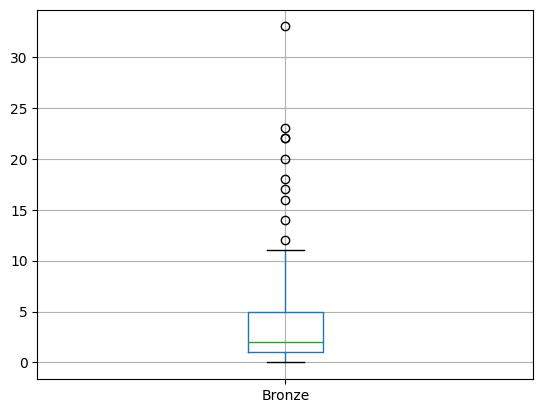

In [57]:
#boxplot
medal_count.boxplot(column='Total', by = None, ax=None)

**OBS:** O caixa do boxplot confirma a desigualdade na distribuição das medalhas entre os países, onde poucos países conquistaram muitas medalhas, enquanto a grande maioria obteve poucas ou nenhuma medalha.
**REVER ESSA INTERPRETAÇÂO**

**Tabela de Frequência**
Uma contagem dos valores numéricos dos dados que se encaixam em um conjunto de intervalos (bins).

In [59]:
#Tabela de Frequência
pd.cut(medal_count['Total'], bins = 10).value_counts()

,count
Total,
"(0.888, 12.2]",72
"(12.2, 23.4]",10
"(34.6, 45.8]",3
"(23.4, 34.6]",2
"(57.0, 68.2]",2
"(45.8, 57.0]",1
"(68.2, 79.4]",1
"(79.4, 90.6]",1
"(101.8, 113.0]",1


In [60]:
# Para melhorar o código e garantir que a tabela de frequência contenha números inteiros de medalhas:

# Definindo os bins com intervalo de 1 em 1 para garantir que temos faixas inteiras
bins = range(0, int(medal_count['Total'].max()) + 10, 10)

# Utilizando pd.cut para criar a tabela de frequência com bins ajustados
frequency_table = pd.cut(medal_count['Total'], bins=bins).value_counts().sort_index()

# Exibindo a tabela de frequência
print(frequency_table)

Total
(0, 10]       69
(10, 20]      12
(20, 30]       2
(30, 40]       4
(40, 50]       1
(50, 60]       1
(60, 70]       1
(70, 80]       1
(80, 90]       1
(90, 100]      0
(100, 110]     0
(110, 120]     1
Name: count, dtype: int64



**Histograma**
Um gráfico da tabela de frequência com os bins no eixo x e a contagem (ou proporção) no eixo y.

**Gráfico de Densidade**
Uma versão suavizada do histograma, frequentemente baseada em uma estimativa de densidade kernel.

<Axes: >

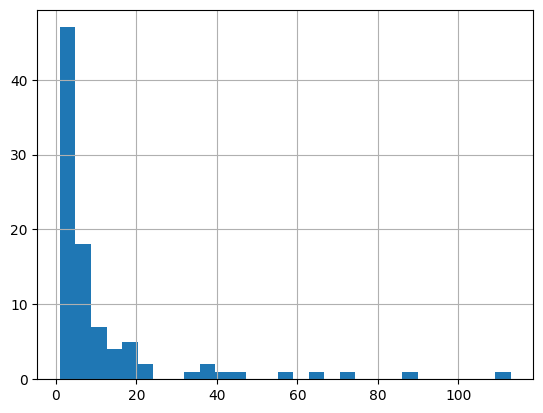

In [64]:
# Histograma

medal_count['Total'].hist(bins = 'auto') #O parâmetro bins = 'auto' permite que o número de bins (intervalos do gráfico) seja determinado. Pode ser estabelecido como 10, 20..

**Momentos Estatísticos:** são conceitos fundamentais na estatística que descrevem diferentes características das distribuições de dados. Vamos explicar cada um dos momentos citados no texto com mais detalhes:

1. **Primeiro Momento (Localização):**

O primeiro momento está relacionado à localização dos dados, e ele é basicamente a média ou o valor esperado da distribuição. Ele nos diz onde os dados estão concentrados, ou seja, qual é o ponto central dos dados.

2. **Segundo Momento (Variabilidade ou Dispersão):**

O segundo momento é relacionado à variabilidade ou dispersão dos dados, e é representado pela variância (ou desvio padrão, que é a raiz quadrada da variância). Ele nos informa o quanto os dados estão espalhados ao redor da média.

3. **Terceiro Momento (Assimetria ou Skewness):**

O terceiro momento está relacionado à assimetria da distribuição, ou seja, como os dados são inclinados para a esquerda ou para a direita. A assimetria pode ser:

* **Positiva (ou direita):** Quando a cauda da distribuição se estende mais para a direita, significando que há mais valores altos ou extremos.
* **Negativa (ou esquerda):** Quando a cauda se estende mais para a esquerda, significando que há mais valores baixos ou extremos.
* **Assimetria Zero:** Significa que a distribuição é simétrica.

**Skewness (assimetria)** nos ajuda a entender se a distribuição de dados tem uma tendência para a direita ou para a esquerda. Se você observar um gráfico de dispersão ou um histograma, a assimetria pode ser percebida visualmente, com os dados "puxando" para um lado.

4. **Quarto Momento (Curtose ou Kurtosis):**

O quarto momento está relacionado à curtose, que mede a propensão da distribuição de ter valores extremos (outliers). A curtose pode ser:
* **Alta Curtose:** Quando a distribuição tem caudas mais pesadas, indicando que os dados possuem mais valores extremos.
* **Baixa Curtose:** Quando a distribuição tem caudas mais leves, significando que há menos outliers.
* **Curtose Normal:** Refere-se a uma distribuição com caudas de tamanho padrão (como a distribuição normal).

**Gráficos de Densidade e Estimativas:**
Os gráficos de densidade são uma forma suavizada de visualizar a distribuição dos dados, representando os valores como uma linha contínua. Eles são comumente usados para mostrar a probabilidade de ocorrência de diferentes valores em um conjunto de dados. Por outro lado, as estimativas de densidade referem-se a métodos utilizados para calcular a função de densidade de probabilidade a partir de uma amostra de dados, frequentemente utilizando a técnica de Estimativa de Densidade Kernel (KDE).

<Axes: ylabel='Density'>

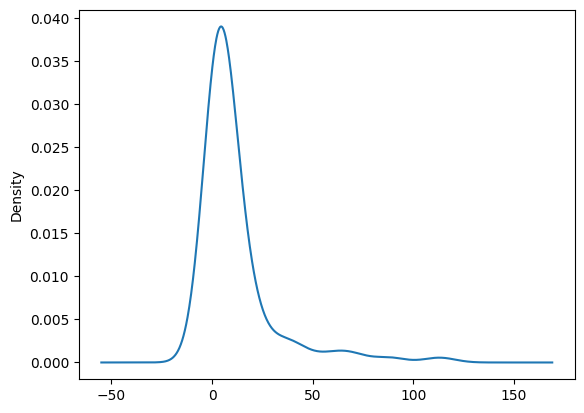

In [65]:
#Gráficos de Densidade

medal_count['Total'].plot(kind = 'density')

<Axes: ylabel='Density'>

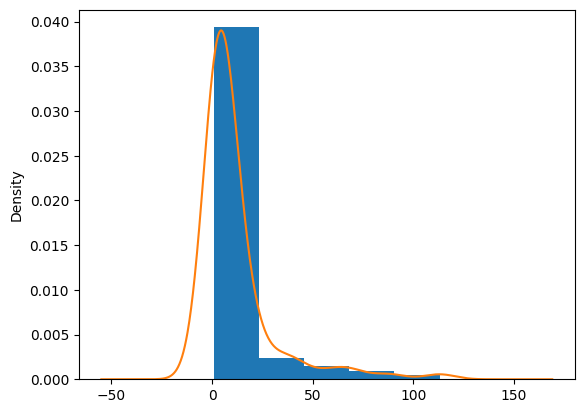

In [69]:
ax = medal_count['Total'].plot.hist(density=True, bins=5)
medal_count['Total'].plot.density(ax=ax)

**COMENTÁRIO**

# Explorando Dados Binário e Categóricos

* **Moda (Mode)**
A categoria ou valor que ocorre com mais frequência em um conjunto de dados.

* **Valor Esperado (Expected Value)**
Quando as categorias podem ser associadas a um valor numérico, isso fornece um valor médio baseado na probabilidade de ocorrência de cada categoria.

* **Gráficos de Barras (Bar Charts)**
A frequência ou proporção de cada categoria é representada por barras.

* **Gráficos de Pizza (Pie Charts)**
A frequência ou proporção de cada categoria é representada por fatias em um gráfico de pizza.

In [74]:
#Moda

medal_count['Total'].mode()

,Total
0,1


Text(0.5, 0, 'País')

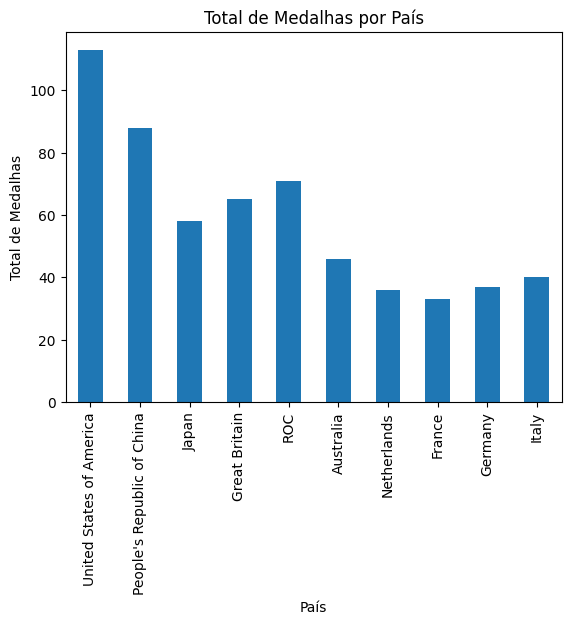

In [84]:
#Bar Charts
ax = medal_count.iloc[:10, :].plot.bar(x='Team/NOC', y='Total', legend=False)
ax.set_title('Total de Medalhas por País')
ax.set_ylabel('Total de Medalhas')
ax.set_xlabel('País')

<Axes: ylabel='Total'>

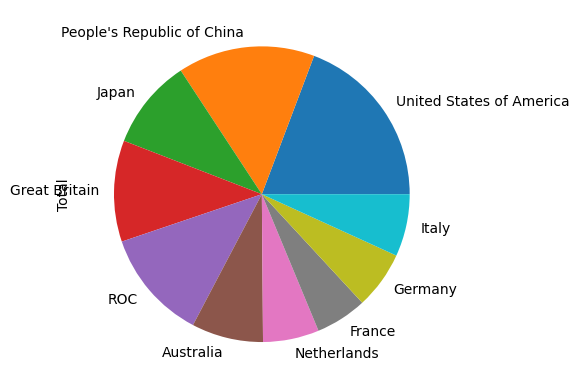

In [94]:
#**Pie Charts**
medal_count.iloc[:10, :].plot.pie(y='Total', labels=medal_count.iloc[:10, :]['Team/NOC'], legend=False)


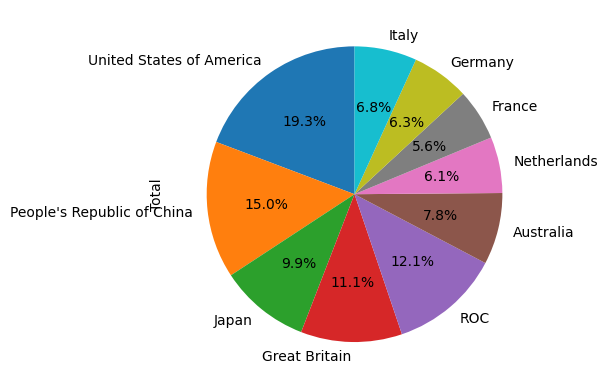

In [96]:
import matplotlib.pyplot as plt

# Criando o gráfico de pizza com as porcentagens
ax = medal_count.iloc[:10, :].plot.pie(
    y='Total',
    labels=medal_count.iloc[:10, :]['Team/NOC'],
    legend=False,
    autopct='%1.1f%%',  # Formato para exibir a porcentagem com uma casa decimal
    startangle=90  # Começar o gráfico de pizza a partir do topo
)

# Exibindo o gráfico
plt.show()

# **Explorando duas ou mais Variáveis**

# **Correlação**

* **Coeficiente de Correlação**
UUma métrica que avalia o grau de associação entre variáveis numéricas, variando de -1 a +1. Normalmente, utiliza-se o Coeficiente de Correlação de Pearson (PCC), que é sensível a outliers.

* **Matriz de Correlação:**
Uma tabela onde as variáveis são exibidas tanto nas linhas quanto nas colunas, e os valores das células são as correlações entre as variáveis

In [101]:
#Matriz de correlação

medal_count.select_dtypes(include='number').corr() # Calculando a correlação apenas das colunas numéricas

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


* **Gráfico de Dispersão (Scatterplot):**
Um gráfico no qual o eixo x representa os valores de uma variável e o eixo y representa os valores de outra variável.

<Axes: xlabel='Total', ylabel='Gold'>

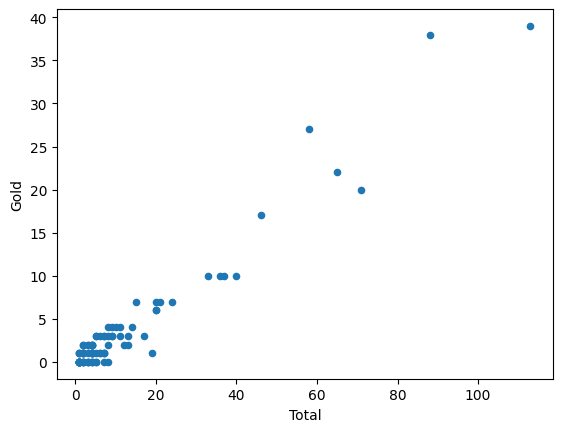

In [106]:
#Gráfico de Dispersão
medal_count.plot.scatter(x='Total', y='Gold')

**Estimeadores, como a média e a variância, analisam variáveis uma de cada vez (análise univariada). A análise de correlação é um método importante que compara duas variáveis (análise bivariada).**

* **Hexagonal binning**
Um gráfico de duas variáveis numéricas com os registros agrupados em hexágonos.

<Axes: xlabel='Total', ylabel='Gold'>

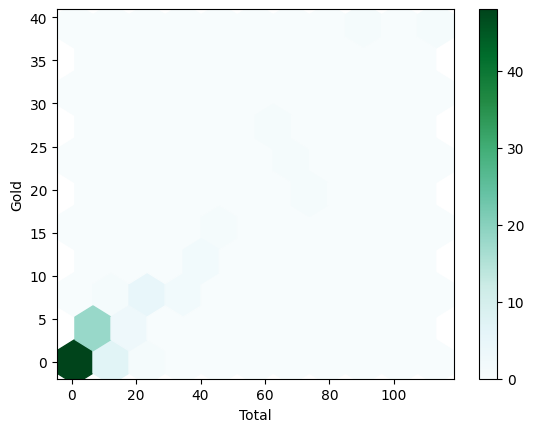

In [107]:
  #Hexagonal binning

  medal_count.plot.hexbin(x='Total', y='Gold', gridsize=10)

* **Gráficos de contorno**
Um gráfico que mostra a densidade de duas variáveis numéricas, semelhante a um mapa topográfico.

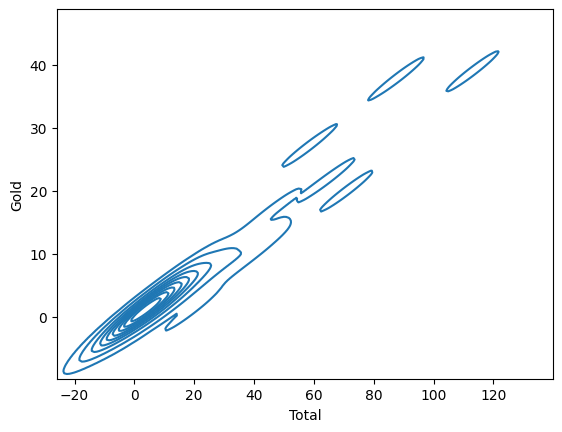

In [109]:
#Gráficos de contorno
import seaborn as sns

ax = sns.kdeplot(data=medal_count, x='Total', y='Gold')

* **Gráficos de violino:**Semelhantes aos gráficos de caixa (boxplot), mas mostrando a estimativa de densidade da distribuição dos dados.

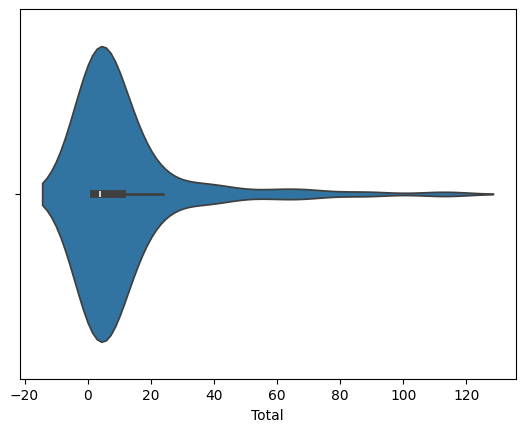

In [126]:
#Violin plots

ax = sns.violinplot(x=medal_count['Total'])

* **Mapa de Calor:** Mapas de calor oferecem outra maneira de visualizar os dados, utilizando cores para comunicar densidades.

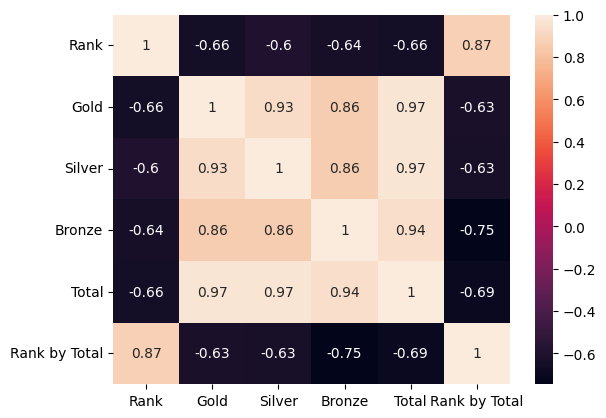

In [111]:
#heatmap

ax = sns.heatmap(medal_count.select_dtypes(include='number').corr(), annot=True)

In [11]:
#continigency table

crosstab = medal_count.pivot_table(index='Team/NOC', columns='Gold',
aggfunc=lambda x: len(x), margins=True)
crosstab.fillna(0, inplace=True)
crosstab

Bronze                                             \
Gold                          0     1     2     3    4    6    7   10   17   
Team/NOC                                                                     
Argentina                   1.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
Armenia                     1.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
Australia                   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  1.0   
Austria                     0.0   1.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
Azerbaijan                  1.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
...                         ...   ...   ...   ...  ...  ...  ...  ...  ...   
Ukraine                     0.0   1.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
United States of America    0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
Uzbekistan                  0.0   0.0   0.0   1.0  0.0  0.0  0.0  0.0  0.0   
Venezuela                   0.0   1.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
All                        28.0  22.0  11.0  11.0  5.0  2.0  4.0  4.0  1.0   

                               ... Total                                     \
Gold                       20  ...     6    7   10   17   20   22   27   38   
Team/NOC                       ...                                            
Argentina                 0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Armenia                   0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Australia                 0.0  ...   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
Austria                   0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Azerbaijan                0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                       ...  ...   ...  ...  ...  ...  ...  ...  ...  ...   
Ukraine                   0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
United States of America  0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Uzbekistan                0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Venezuela                 0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
All                       1.0  ...   2.0  4.0  4.0  1.0  1.0  1.0  1.0  1.0   

                                   
Gold                       39 All  
Team/NOC                           
Argentina                 0.0   1  
Armenia                   0.0   1  
Australia                 0.0   1  
Austria                   0.0   1  
Azerbaijan                0.0   1  
...                       ...  ..  
Ukraine                   0.0   1  
United States of America  1.0   1  
Uzbekistan                0.0   1  
Venezuela                 0.0   1  
All                       1.0  93  

[94 rows x 75 columns]